In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('illinois_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]
covid_test = covid_test[['y', 'new_cases_2_lag', 'new_cases_10_min', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_30_lag', 'current_intensive_care_patients', 'new_cases_150_lag', 'new_cases_7_lag', 'relative_humidity', 'new_deaths_100_std', 'new_deaths_1_lag', 'new_cases_1 lag', 'new_deaths_50_lag', 'new_cases_10_std', 'new_deaths_3_lag', 'new_cases_3_lag', 'new_deaths_7_lag', 'new_cases_10_mean', 'new_deaths_2_lag', 'dew_point', 'new_cases_50_std', 'new_deaths_4_lag', 'average_temperature_celsius', 'new_hospitalized_patients', 'new_cases_4_lag', 'new_cases_10_max']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:5282.37373	validation_1-rmse:18771.17026
[1]	validation_0-rmse:5237.80082	validation_1-rmse:18682.77964
[2]	validation_0-rmse:5193.67172	validation_1-rmse:18595.43180
[3]	validation_0-rmse:5149.98286	validation_1-rmse:18508.89278
[4]	validation_0-rmse:5106.73014	validation_1-rmse:18423.14945
[5]	validation_0-rmse:5063.88292	validation_1-rmse:18338.51373
[6]	validation_0-rmse:5021.45068	validation_1-rmse:18255.06240
[7]	validation_0-rmse:4979.45296	validation_1-rmse:18172.31975
[8]	validation_0-rmse:4937.86358	validation_1-rmse:18090.70667
[9]	validation_0-rmse:4896.70435	validation_1-rmse:18009.93958
[10]	validation_0-rmse:4855.93559	validation_1-rmse:17930.31712
[11]	validation_0-rmse:4815.58127	validation_1-rmse:17851.62015
[12]	validation_0-rmse:4775.72685	validation_1-rmse:17780.46028
[13]	validation_0-rmse:4736.14000	validation_1-rmse:17703.66547
[14]	validation_0-rmse:4697.00143	validation_1-rmse:17627.54295
[15]	validation_0-rmse:4658.31489	validation_1-rms

[128]	validation_0-rmse:1986.63669	validation_1-rmse:12896.98819
[129]	validation_0-rmse:1973.07522	validation_1-rmse:12871.13368
[130]	validation_0-rmse:1959.42220	validation_1-rmse:12846.10084
[131]	validation_0-rmse:1946.01447	validation_1-rmse:12821.54405
[132]	validation_0-rmse:1932.72880	validation_1-rmse:12797.30522
[133]	validation_0-rmse:1919.55608	validation_1-rmse:12773.37466
[134]	validation_0-rmse:1906.50999	validation_1-rmse:12749.75467
[135]	validation_0-rmse:1893.57897	validation_1-rmse:12726.47792
[136]	validation_0-rmse:1880.76405	validation_1-rmse:12703.47373
[137]	validation_0-rmse:1868.06323	validation_1-rmse:12680.80576
[138]	validation_0-rmse:1855.47627	validation_1-rmse:12658.40633
[139]	validation_0-rmse:1842.93699	validation_1-rmse:12636.51377
[140]	validation_0-rmse:1830.50950	validation_1-rmse:12614.89093
[141]	validation_0-rmse:1818.17850	validation_1-rmse:12593.57450
[142]	validation_0-rmse:1805.96830	validation_1-rmse:12572.53294
[143]	validation_0-rmse:1

[255]	validation_0-rmse:905.56300	validation_1-rmse:11444.63038
[256]	validation_0-rmse:900.56872	validation_1-rmse:11442.33124
[257]	validation_0-rmse:895.59309	validation_1-rmse:11438.91982
[258]	validation_0-rmse:890.77893	validation_1-rmse:11435.58727
[259]	validation_0-rmse:885.99318	validation_1-rmse:11432.34088
[260]	validation_0-rmse:881.13432	validation_1-rmse:11429.20561
[261]	validation_0-rmse:876.39847	validation_1-rmse:11427.30159
[262]	validation_0-rmse:871.74012	validation_1-rmse:11424.31283
[263]	validation_0-rmse:867.03370	validation_1-rmse:11421.42572
[264]	validation_0-rmse:862.32434	validation_1-rmse:11418.62153
[265]	validation_0-rmse:857.65685	validation_1-rmse:11415.88188
[266]	validation_0-rmse:853.09950	validation_1-rmse:11414.35821
[267]	validation_0-rmse:848.58733	validation_1-rmse:11411.76969
[268]	validation_0-rmse:844.17462	validation_1-rmse:11409.73158
[269]	validation_0-rmse:839.72289	validation_1-rmse:11408.41749
[270]	validation_0-rmse:835.26880	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

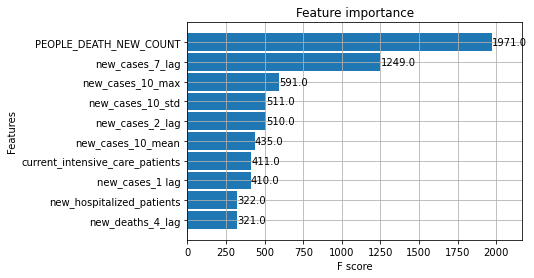

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

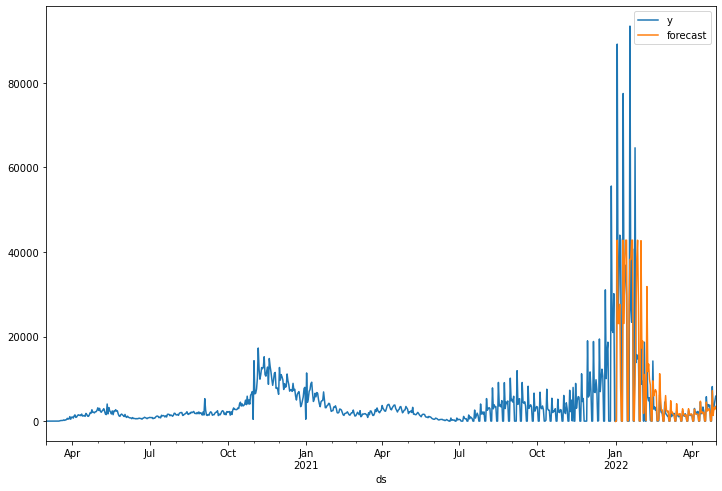

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

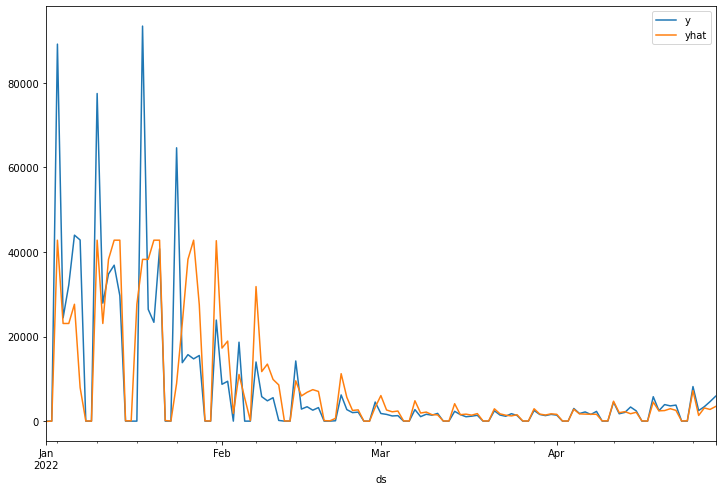

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  11383.759001319993
Test MAE:  4834.049495893366
MASE =  0.5749211982613988


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

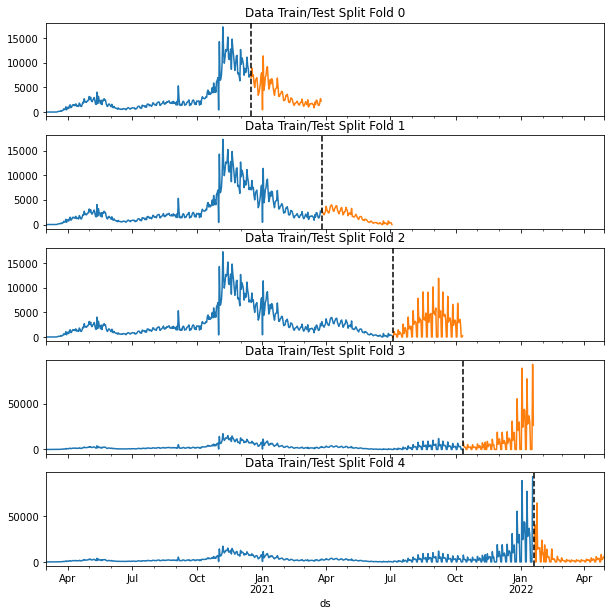

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[00:05:45] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5284.61784	validation_1-rmse:18774.67595
[100]	validation_0-rmse:2586.14953	validation_1-rmse:13674.28889
[200]	validation_0-rmse:1595.98474	validation_1-rmse:11729.33023
[300]	validation_0-rmse:1166.30233	validation_1-rmse:11373.35318
[325]	validation_0-rmse:1103.52809	validation_1-rmse:11380.49935
[00:05:46] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5284.61784	validation_1-rmse:18774.67595
[100]	validation_0-rmse:2586.14953	validation_1-rmse:13674.28889
[200]	validation_0-rmse:1595.98474	validation_1-rmse:11729.33023
[300]	validation_0-rmse:1166.30233	validation_1-rmse:11373.35318
[324]	validation_0-rmse:1106.04175	validation_1-rmse:11379.92064
[00:

<AxesSubplot:xlabel='ds'>

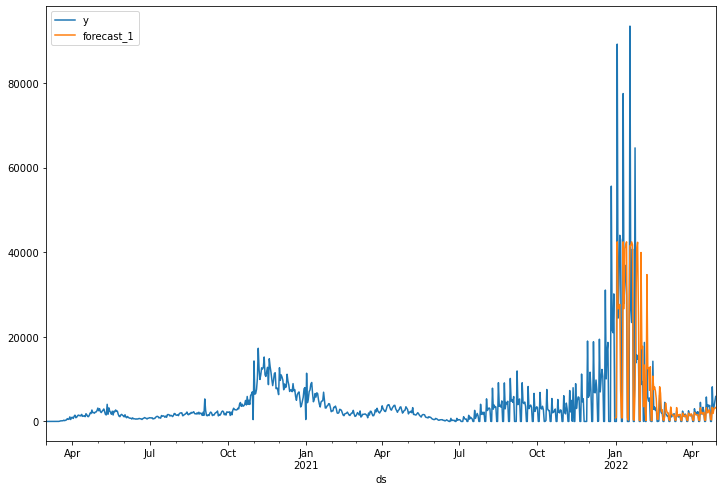

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

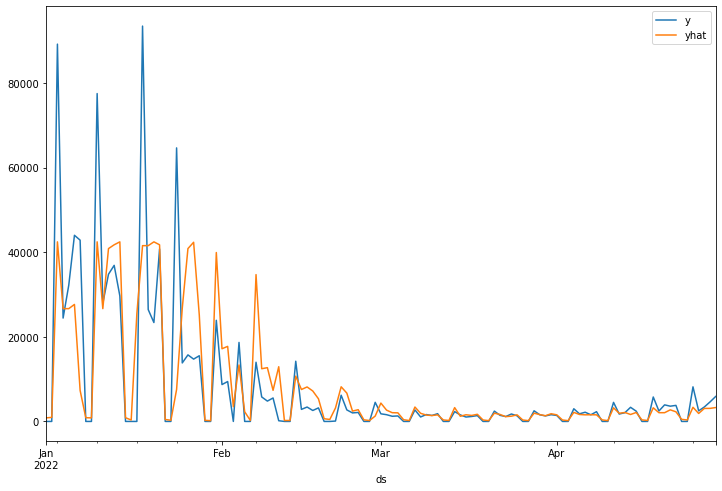

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  11383.759001319993
Test MAE:  4834.049495893366
MASE =  0.5749211982613988
